In [1]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data as web

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Define dataframe variable
spy = pd.DataFrame()

# Define stock that will be analysed
asset = 'SPY'
 
# Import data into dataframe
spy = web.DataReader(asset, data_source='yahoo', start='01-01-2000')

spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,98.564461
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,94.709984
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,94.879379
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,93.354584
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,98.776245


# Absolute price oscillator

The absolute price oscillator, often to as APO, is a type of indicator that builds on top of moving averages of prices to capture specific short-term deviations in price action.

The absolute price oscillator is calculated by finding the difference between a fast exponential moving average and a slow exponential moving average.

A big difference is usually interpreted as: 
- instrument prices are starting to trend or break out
- or instrument prices are far away from their equilibrium prices, i.e. the asset is overbought or oversold

In [3]:
ema_slow = spy['Close'].ewm(span=20, adjust=False).mean()
ema_fast = spy['Close'].ewm(span=10, adjust=False).mean()
apo_values = (ema_fast - ema_slow)

In [13]:
apo_rolling_50 = apo_values.rolling(window=50, min_periods=1).mean()

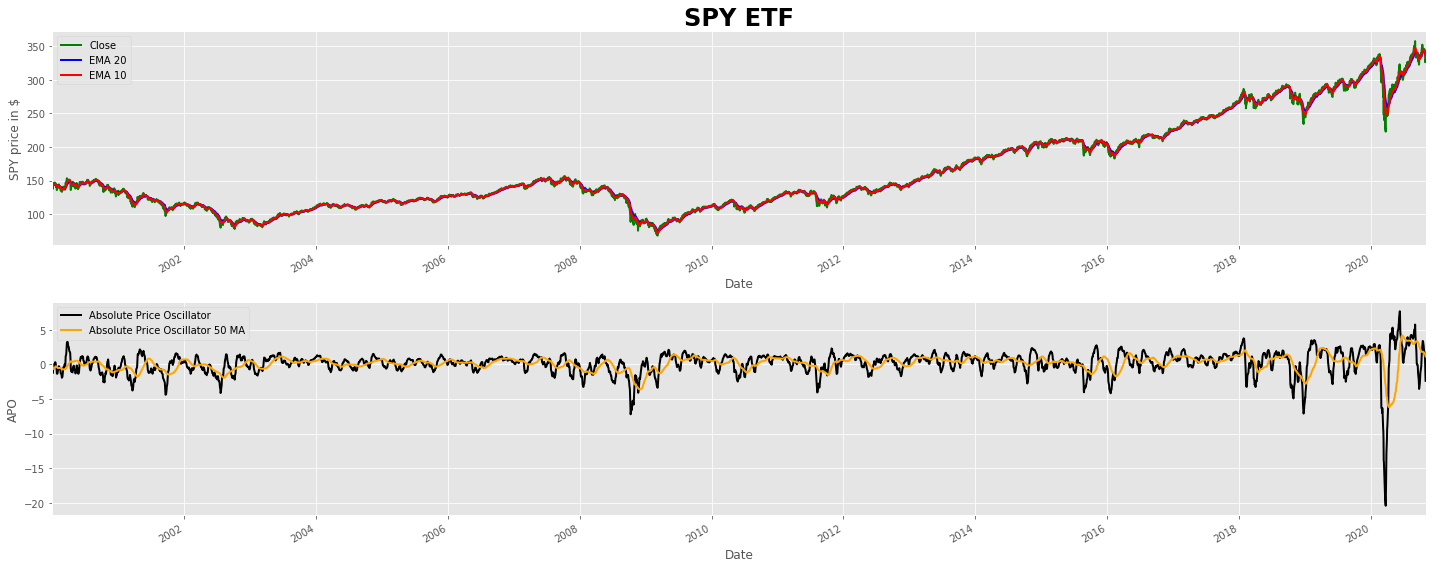

In [18]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211, ylabel='SPY price in $') 
plt.title('SPY ETF', fontsize=24, fontweight = 'bold')
spy['Close'].plot(ax=ax1, color='g', lw=2., legend=True) 
ema_slow.plot(ax=ax1, color='b', lw=2., legend=True, label = 'EMA 20')
ema_fast.plot(ax=ax1, color='r', lw=2., legend=True, label = 'EMA 10')

ax2 = fig.add_subplot(212, ylabel='APO') 
apo_values.plot(ax=ax2, color='black', lw=2., legend=True, label = 'Absolute Price Oscillator')
apo_rolling_50.plot(ax=ax2, color='orange', lw=2., legend=True,label = 'Absolute Price Oscillator 50 MA')
plt.tight_layout()
plt.show()

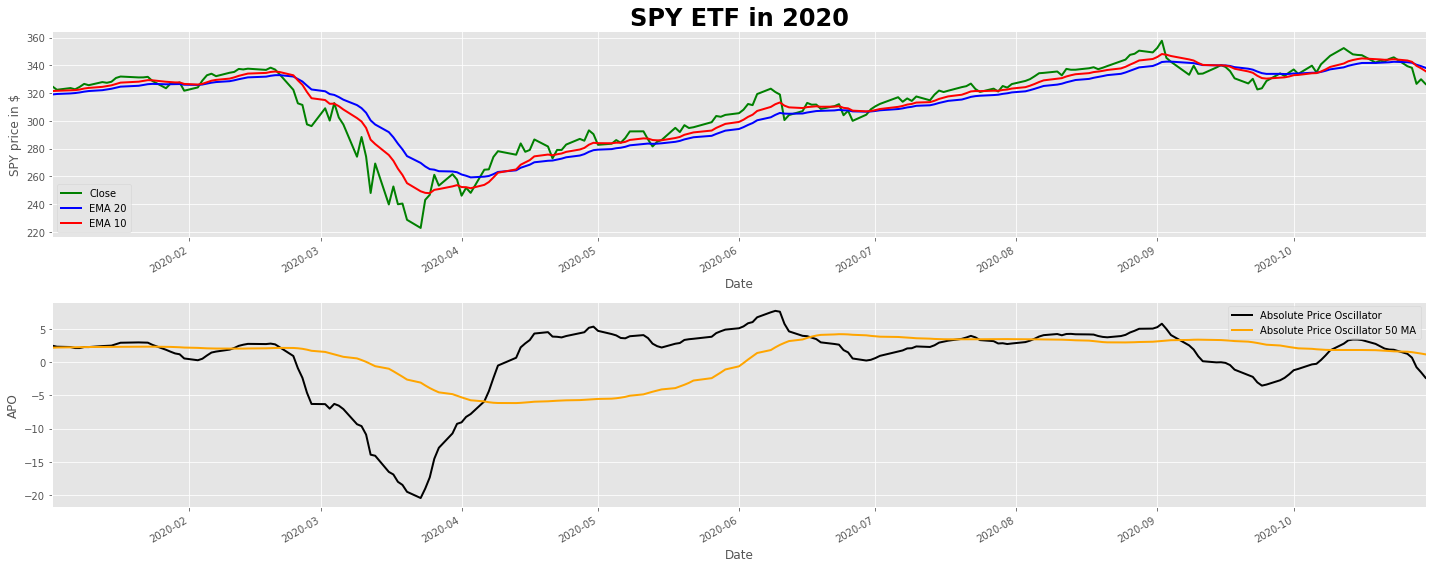

In [19]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211, ylabel='SPY price in $') 
plt.title('SPY ETF in 2020', fontsize=24, fontweight = 'bold')
spy['Close'].loc['2020-01-01':].plot(ax=ax1, color='g', lw=2., legend=True) 
ema_slow.loc['2020-01-01':].plot(ax=ax1, color='b', lw=2., legend=True, label = 'EMA 20')
ema_fast.loc['2020-01-01':].plot(ax=ax1, color='r', lw=2., legend=True, label = 'EMA 10')

ax2 = fig.add_subplot(212, ylabel='APO') 
apo_values.loc['2020-01-01':].plot(ax=ax2, color='black', lw=2., legend=True, label = 'Absolute Price Oscillator')
apo_rolling_50.loc['2020-01-01':].plot(ax=ax2, color='orange', lw=2., legend=True,label = 'Absolute Price Oscillator 50 MA')
plt.tight_layout()
plt.show()